In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('APY.csv')

In [50]:
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [54]:
df = df.rename(columns=lambda x: x.replace(' ', ''))
df

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75
...,...,...,...,...,...,...,...,...
345331,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [58]:
df.describe()

,Crop_Year,Area,Production,Yield
count,345336.000000,3.453360e+05,3.403880e+05,345336.000000
mean,2008.887512,1.167147e+04,9.584726e+05,79.423135
std,6.564361,4.584079e+04,2.153068e+07,916.678396
min,1997.000000,4.000000e-03,0.000000e+00,0.000000
25%,2003.000000,7.400000e+01,8.700000e+01,0.550000
50%,2009.000000,5.320000e+02,7.170000e+02,1.000000
75%,2015.000000,4.112000e+03,7.182000e+03,2.470000
max,2020.000000,8.580100e+06,1.597800e+09,43958.330000


In [60]:
print(df.isnull().sum())

State            0
District         0
Crop             9
Crop_Year        0
Season           0
Area             0
Production    4948
Yield            0
dtype: int64


In [62]:
df['Production'] = df['Production'].fillna(df['Production'].mean())
df = df.dropna(subset=['Crop'])

In [64]:
print(df.isnull().sum())

State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64


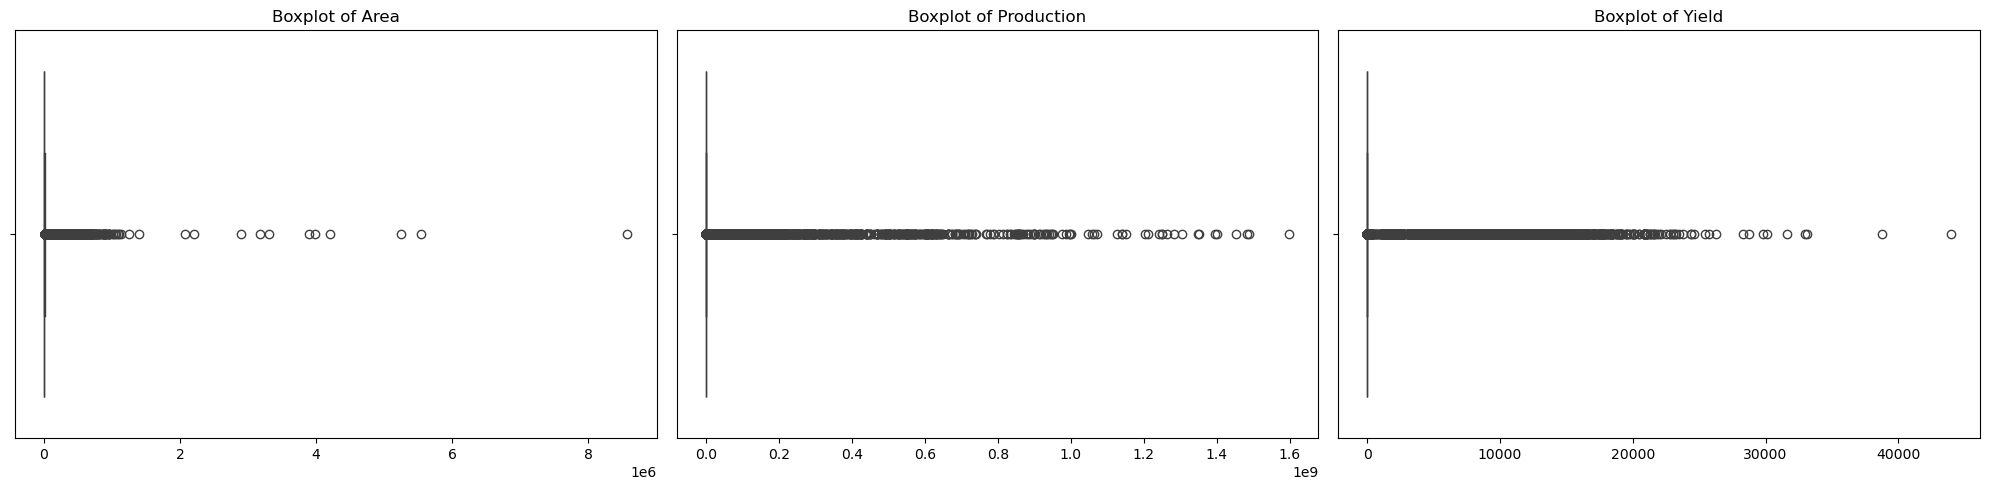

In [68]:
# Select only numerical columns for box plots
columns_to_plot = ['Area', 'Production', 'Yield']

# Create a figure and subplots - adjust the size and layout
fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(20, 5))  # Single row with columns based on number of plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over each column and its corresponding subplot
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel('')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [74]:
def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows where the column value is outside the bounds
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers

# Remove outliers in the 'Area' column
crop_production_no_outlier = remove_outliers(df, 'Area')

# Remove outliers in the 'Production' column
crop_production_no_outlier = remove_outliers(crop_production_no_outlier, 'Production')

# Remove outliers in the 'Yield' column
crop_production_no_outlier = remove_outliers(crop_production_no_outlier, 'Yield')

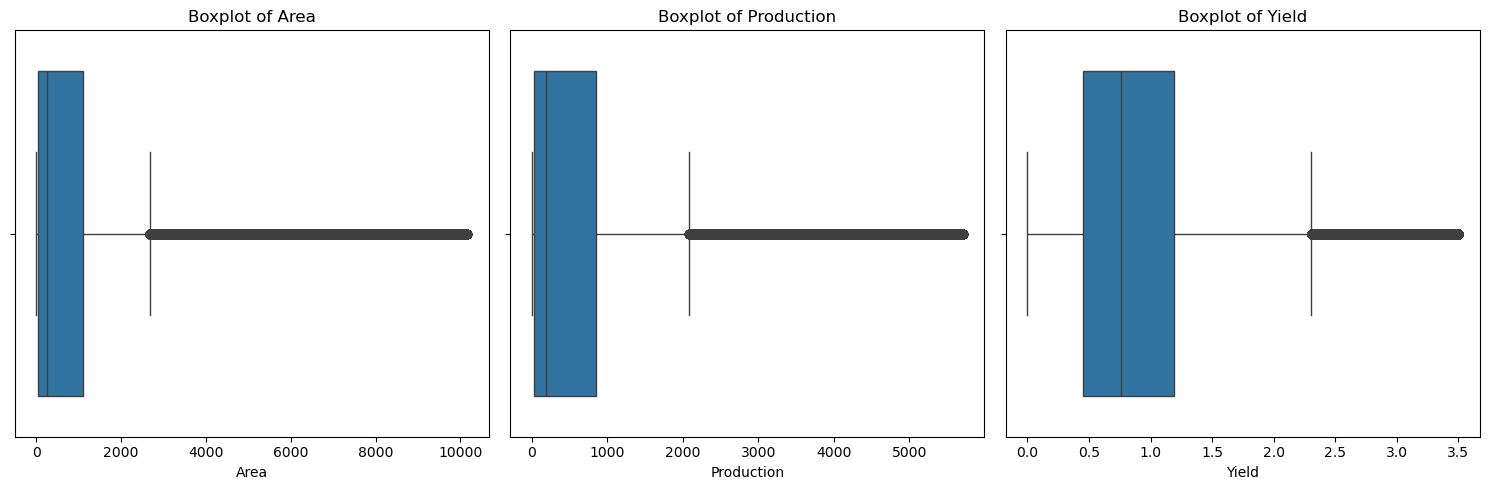

In [78]:
# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Boxplot for 'Area'
sns.boxplot(x=crop_production_no_outlier['Area'], ax=axes[0])
axes[0].set_title('Boxplot of Area')

# Boxplot for 'Production'
sns.boxplot(x=crop_production_no_outlier['Production'], ax=axes[1])
axes[1].set_title('Boxplot of Production')

# Boxplot for 'Yield'
sns.boxplot(x=crop_production_no_outlier['Yield'], ax=axes[2])
axes[2].set_title('Boxplot of Yield')

# Adjust layout to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()


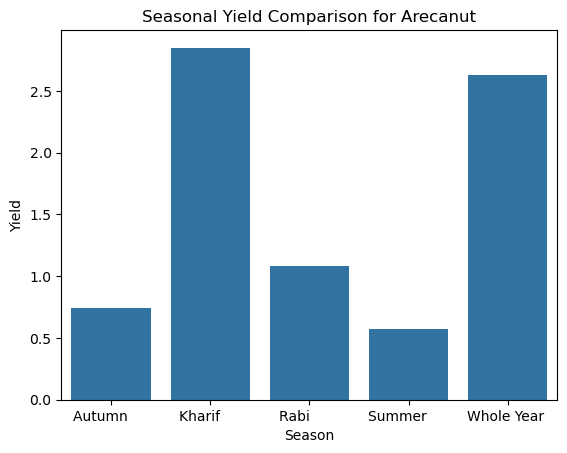

In [82]:
seasonal_yield = df.groupby(['Season', 'Crop'])['Yield'].mean().reset_index()

# Plot seasonal yield comparison for a specific crop
sns.barplot(data=seasonal_yield[seasonal_yield['Crop'] == 'Arecanut'], x='Season', y='Yield')
plt.title('Seasonal Yield Comparison for Arecanut')
plt.show()

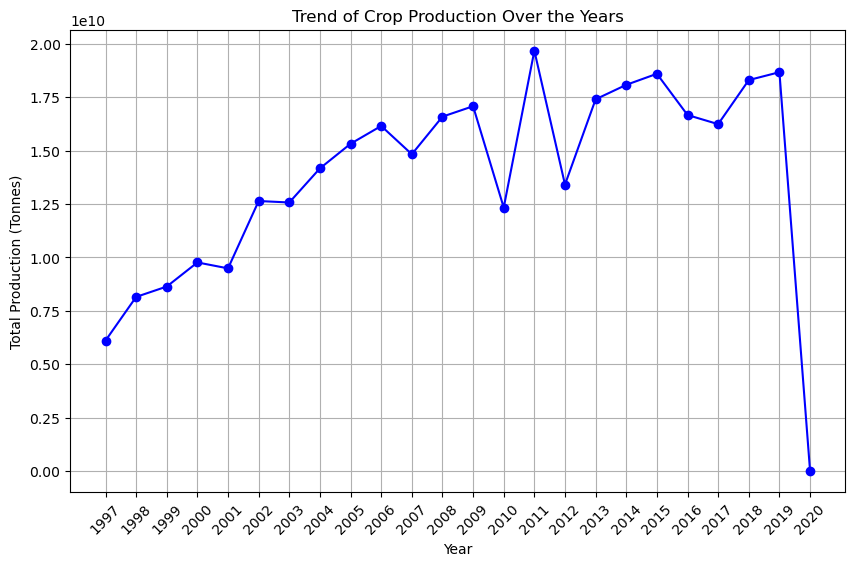

In [84]:
yearly_production = df.groupby('Crop_Year')['Production'].sum()

# Plotting the trend
plt.figure(figsize=(10, 6))
plt.xticks(range(1997, 2021))
plt.plot(yearly_production.index, yearly_production.values, marker='o', color='b')
plt.title('Trend of Crop Production Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Production (Tonnes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


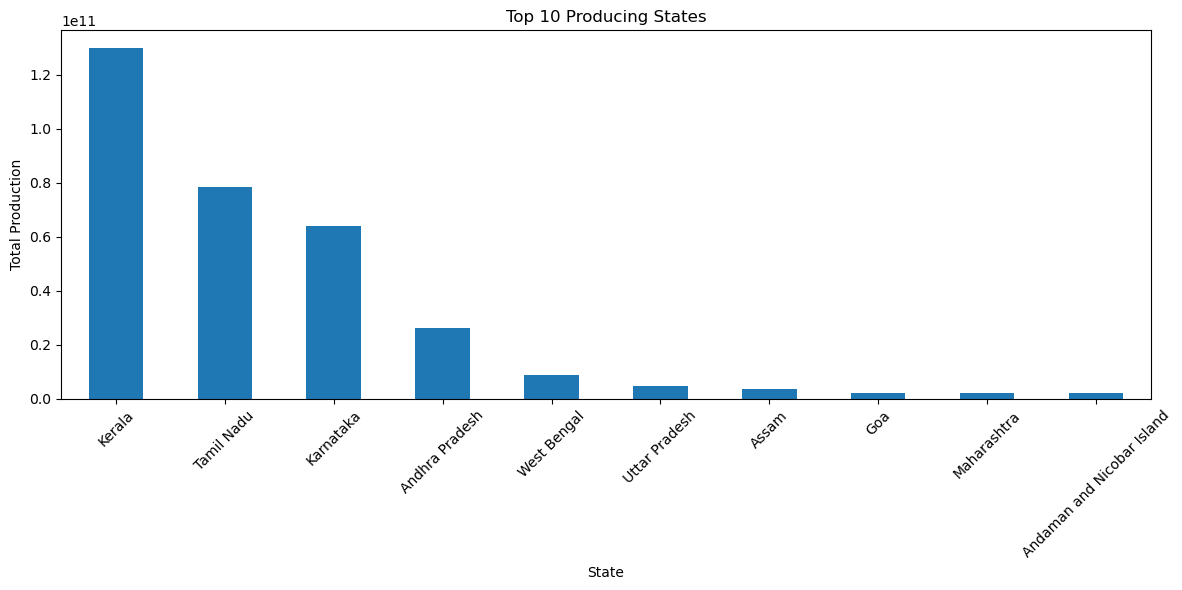

In [88]:
#Top 10 producing states
plt.figure(figsize=(12, 6))
top_states = df.groupby('State')['Production'].sum().nlargest(10)
top_states.plot(kind='bar')
plt.title('Top 10 Producing States')
plt.xlabel('State')
plt.ylabel('Total Production')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()